# HR Analytics: Job Change of Data Scientists
### Analysis of Data Mining Algorithms

Binary Classification model


## Basic EDA

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns     
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.4.1'

### Importing Dataset

In [ ]:
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Viewing Dimensions of Dataset

In [ ]:
df.shape

(19158, 14)

### Basic Information about Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Describe function which gives Summary of numeric values

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### To find unique values in each data column 

In [ ]:
df.nunique(axis=0)

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

### To check the NULL/NA values in the Dataset

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Univariate EDA

### Identifying missing values in columns and Replacing them

#### Replacing the null values in "gender", "enrolled_university", "education_level" and "educational_level" columns with "Other"


In [ ]:
requiredColumns = ["gender", "enrolled_university", "education_level", "company_type"] 

In [ ]:
for column in requiredColumns:
  print(df[column].value_counts()) 
  print("---------------------------------------------")
  print(df[column].isnull().sum(),' Missing Values')
  print("---------------------------------------------")
  df[column].fillna('Other', inplace=True) 

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
---------------------------------------------
4508  Missing Values
---------------------------------------------
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
---------------------------------------------
386  Missing Values
---------------------------------------------
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
---------------------------------------------
460  Missing Values
---------------------------------------------
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
---------------------------------------------
6140  Missing Values
---------------------------------------------


#### Replacing the null values of "major_discipline" column with Mode value

In [ ]:
print(df["major_discipline"].value_counts())
print("---------------------------------------------")
print(df.isnull().sum(),' Missing Values')
print("---------------------------------------------")

cols = ["major_discipline"]
df[cols]=df[cols].fillna(df.mode().iloc[0])
df.head(10) 

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
---------------------------------------------
enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                  65
company_size              5938
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64  Missing Values
---------------------------------------------


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


#### Dropping the null values of "experience" column

In [ ]:
print(df["experience"].value_counts())
print("---------------------------------------------")
print(df["experience"].isnull().sum(),"Missing Values")
print("---------------------------------------------")

# We are dropping NULL values as we think assigning random values won't be a good idea.
df.dropna(inplace=True)

# Verifying dimensions after dropping NULL values
print(df.shape)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
---------------------------------------------
65 Missing Values
---------------------------------------------
(12977, 14)


### Plots of features distribution based on count

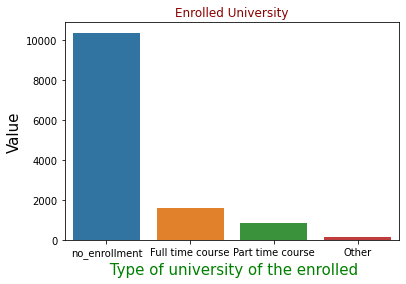

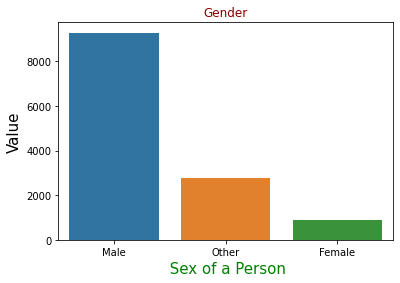

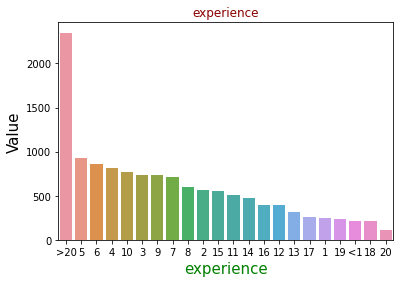

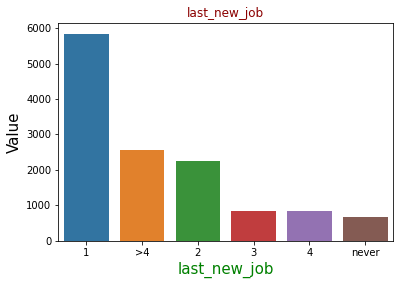

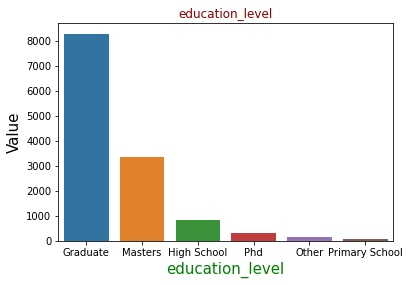

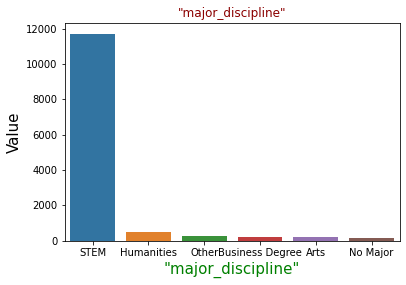

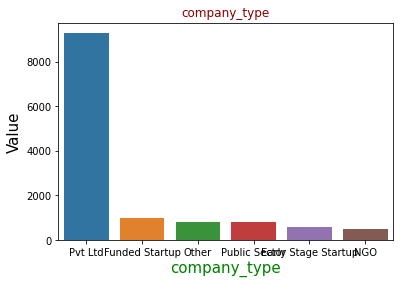

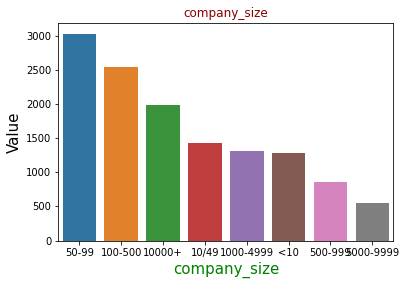

In [ ]:
# visualising the values of each columns, after replacing the null values  

university = df["enrolled_university"].value_counts()
ax= sns.barplot(x=university.index, y=university.values)
plt.xlabel(' Type of university of the enrolled', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred")
plt.show()

sex = df["gender"].value_counts()
ax= sns.barplot(x=sex.index, y=sex.values)
plt.xlabel(' Sex of a Person', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('Gender', color = "darkred")
plt.show()

exp = df["experience"].value_counts()
ax= sns.barplot(x=exp.index, y=exp.values)
plt.xlabel('experience', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('experience', color = "darkred")
plt.show()

lnj = df["last_new_job"].value_counts()
ax= sns.barplot(x=lnj.index, y=lnj.values)
plt.xlabel('last_new_job', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('last_new_job', color = "darkred")
plt.show()

el = df["education_level"].value_counts()
ax= sns.barplot(x=el.index, y=el.values)
plt.xlabel('education_level', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('education_level', color = "darkred")
plt.show()

md = df["major_discipline"].value_counts()
ax= sns.barplot(x=md.index, y=md.values)
plt.xlabel('"major_discipline"', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('"major_discipline"', color = "darkred")
plt.show()

ct = df["company_type"].value_counts()
ax= sns.barplot(x=ct.index, y=ct.values)
plt.xlabel("company_type", size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('company_type', color = "darkred")
plt.show()

cs = df["company_size"].value_counts()
ax= sns.barplot(x=cs.index, y=cs.values)
plt.xlabel('company_size', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('company_size', color = "darkred")
plt.show()


## Label Encoding the necessary Columns

### "experience" column

#### Viewing Unique Values for "experience" column

In [ ]:
df['experience'].unique()

array(['15', '>20', '5', '13', '7', '17', '16', '1', '2', '11', '<1',
       '14', '18', '19', '12', '10', '4', '6', '9', '3', '8', '20'],
      dtype=object)

#### Encoding the values of "experience" column

In [ ]:
 def replaceExperience(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0
    else:
        return experience

df.experience =df.experience.map(replaceExperience) 
df['experience'].unique()       

array(['15', 21, '5', '13', '7', '17', '16', '1', '2', '11', 0, '14',
       '18', '19', '12', '10', '4', '6', '9', '3', '8', '20'],
      dtype=object)

### "last_new_job" column

#### Viewing Unique Values for "last_new_job" column

In [ ]:
df['last_new_job'].unique()

array(['>4', '4', '1', '3', 'never', '2'], dtype=object)

#### Encoding the values of "last_new_job" column

In [ ]:
def replaceLastNewJob(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0

    else:
        return last_new_job

df.last_new_job =df.last_new_job.map(replaceLastNewJob)
df['last_new_job'].unique()

array([5, '4', '1', '3', 0, '2'], dtype=object)

### "Gender" column

#### Viewing Unique Values for "gender" column

In [ ]:
df['gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

#### Encoding the values

In [ ]:
def replacegender(gender):
    if gender == 'Male':
        return 0
    elif gender == 'Female':
        return 1
    else:
        return -1
df.gender =df.gender.map(replacegender)
df['gender'].unique()

array([ 0, -1,  1])

### "education_level" column

#### Viewing Unique Values for "education_level" column

In [ ]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Other',
       'Primary School'], dtype=object)

#### Encoding the values

In [ ]:
def replaceEducationLevel(education_level):
    if education_level == 'Primary School':
        return 0
    elif education_level == 'High School':
        return 1
    elif education_level == 'Graduate':
        return 2
    elif education_level == 'Masters':
        return 3
    elif education_level == 'Phd':
        return 4
    else:
        return -1

df.education_level =df.education_level.map(replaceEducationLevel)
df['education_level'].unique()

array([ 2,  3,  1,  4, -1,  0])

## Changing the data type of Variables

In [ ]:
df['experience']=df['experience'].astype('int')
df['last_new_job']=df['last_new_job'].astype('int')
df['target']=df['target'].astype('int64')
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                      int64
relevent_experience        object
enrolled_university        object
education_level             int64
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

In [ ]:
df.describe()

,enrollee_id,city_development_index,gender,education_level,experience,last_new_job,training_hours,target
count,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000
mean,16720.633351,0.836418,-0.145873,2.199507,10.829468,2.226555,65.693304,0.175850
std,9688.964703,0.120019,0.512999,0.705824,6.578826,1.640415,60.616975,0.380707
min,2.000000,0.448000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,8310.000000,0.762000,0.000000,2.000000,5.000000,1.000000,23.000000,0.000000
50%,16650.000000,0.910000,0.000000,2.000000,10.000000,1.000000,47.000000,0.000000
75%,25197.000000,0.920000,0.000000,3.000000,16.000000,4.000000,89.000000,0.000000
max,33380.000000,0.949000,1.000000,4.000000,21.000000,5.000000,336.000000,1.000000


## Bivariate EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


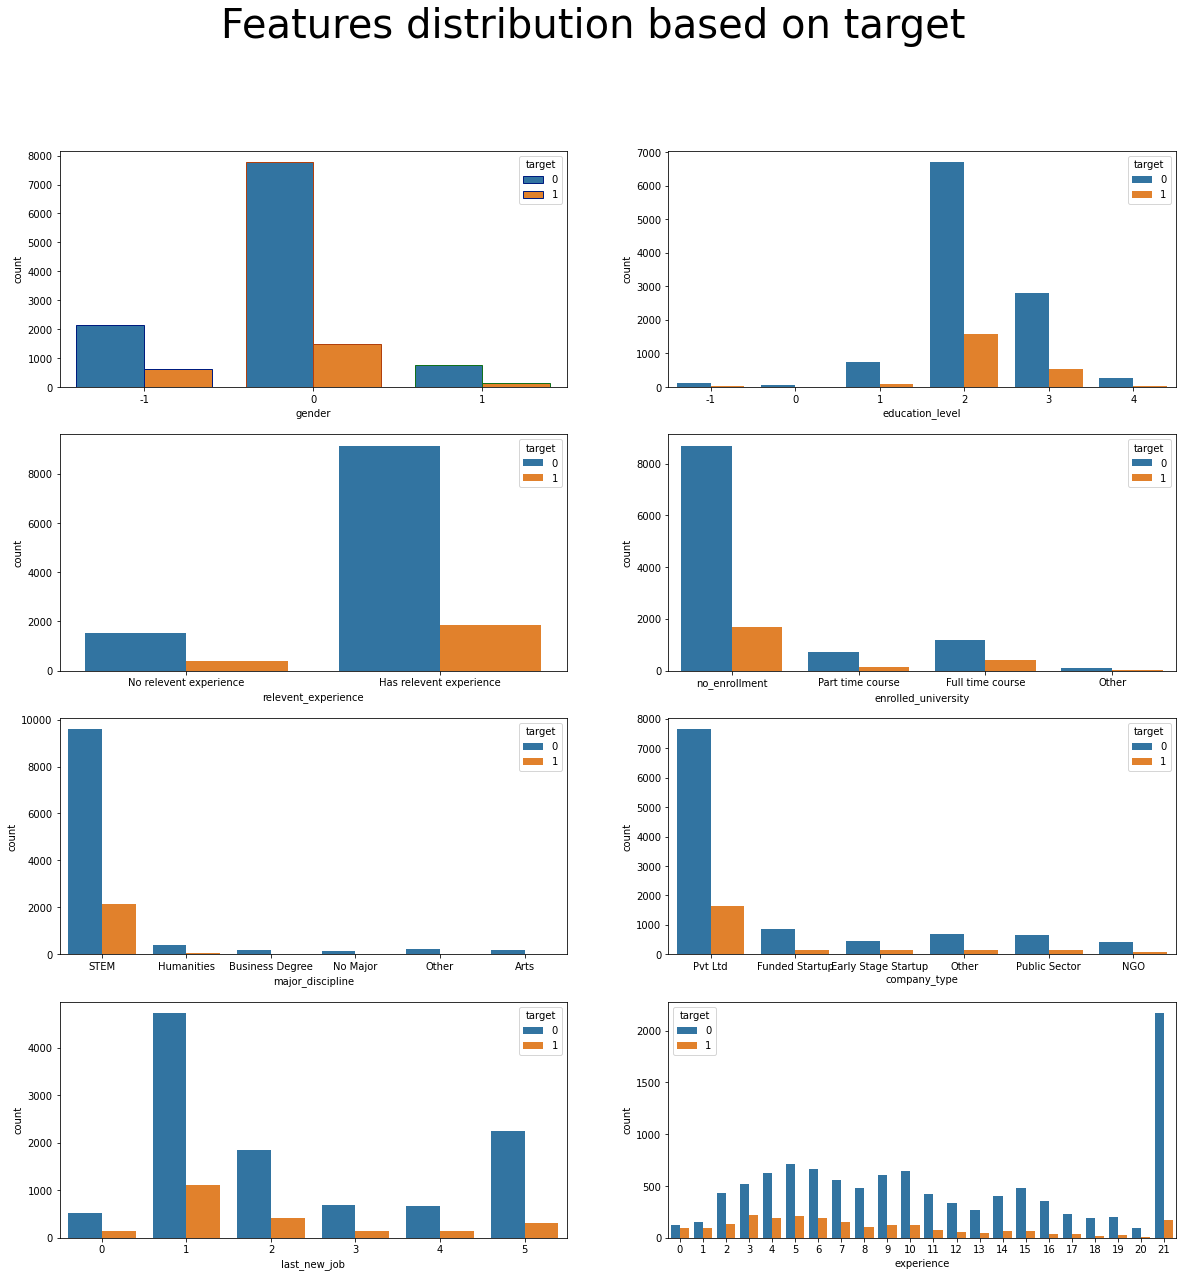

In [ ]:
# bivariate eda : plotting all columns against target column
fig_dims = (20, 20)
fig, ax =plt.subplots(4,2,figsize = fig_dims)
sns.countplot(x = df['gender'],hue = df['target'], ax=ax[0,0], edgecolor=sns.color_palette("dark", 60))
sns.countplot(df['education_level'],hue = df['target'], ax=ax[0,1])
sns.countplot(x =df['relevent_experience'],hue = df['target'], ax=ax[1,0])
sns.countplot(df['enrolled_university'],hue = df['target'], ax=ax[1,1])
sns.countplot(x =df['major_discipline'],hue = df['target'], ax=ax[2,0])
sns.countplot(x = df['company_type'],hue = df['target'], ax=ax[2,1])
sns.countplot(x = df['last_new_job'],hue = df['target'], ax=ax[3,0])
sns.countplot(x = df['experience'],hue = df['target'], ax=ax[3,1])

fig.suptitle('Features distribution based on target ',fontsize=40)
fig.show()

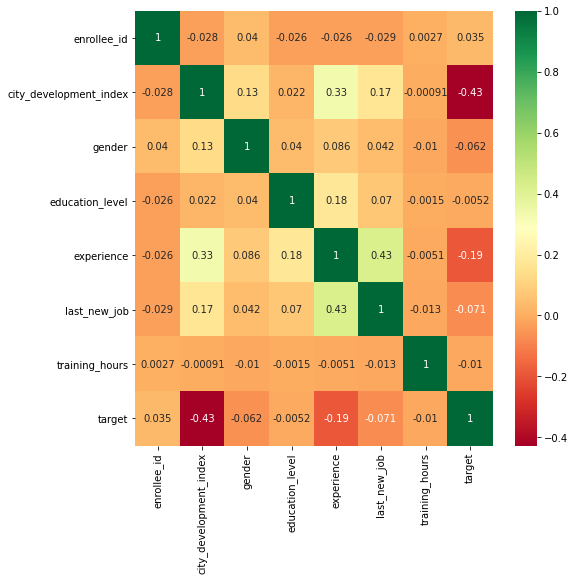

In [ ]:
# corr() -> to find coreeltion between numneric values
corrmat=df.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(8,8)) 
#plot heat map 
#heighesst value -> highly corelates
# sighs represent proportinality 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

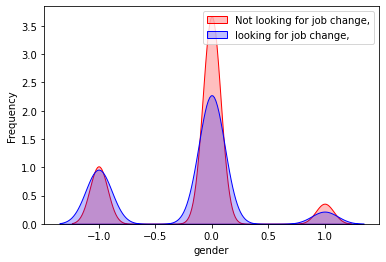

In [ ]:
d = sns.kdeplot(df['gender'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['gender'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('gender')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

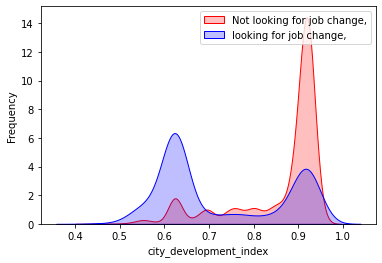

In [ ]:
d = sns.kdeplot(df['city_development_index'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['city_development_index'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('city_development_index')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

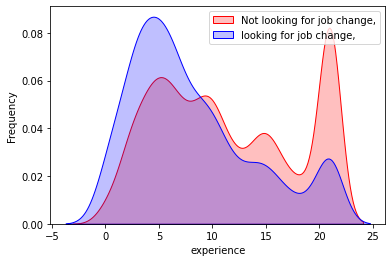

In [ ]:
d = sns.kdeplot(df['experience'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['experience'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('experience')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

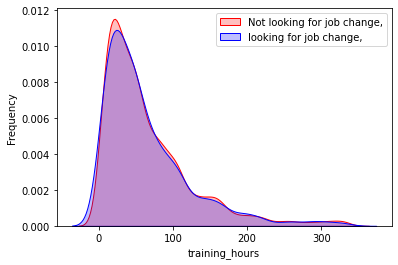

In [ ]:
d = sns.kdeplot(df['training_hours'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
d = sns.kdeplot(df['training_hours'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =d, color="Blue", shade= True)
d.set_xlabel('training_hours')
d.set_ylabel("Frequency")
d = d.legend(["Not looking for job change,","looking for job change,"])

## Label Encoding the Categorical Variables

In [ ]:
# Label encoding by creating Dummy variables

df1 = df.copy() # making a copy of clean data set

df1 = pd.get_dummies(df1,
                    columns=['relevent_experience', 'enrolled_university', 'major_discipline', 'company_type'],
                    drop_first=True) 
print(df1.shape)
df1.head(5)

(12977, 24)


,enrollee_id,city,city_development_index,gender,education_level,experience,company_size,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,29725,city_40,0.776,0,2,15,50-99,5,47,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,666,city_162,0.767,0,3,21,50-99,4,8,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
6,28806,city_160,0.920,0,1,5,50-99,1,24,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
7,402,city_46,0.762,0,2,13,<10,5,18,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
8,27107,city_103,0.920,0,2,7,50-99,1,46,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## Analyzing Target Variable

In [ ]:
print(df['target'].value_counts())

0    10695
1     2282
Name: target, dtype: int64


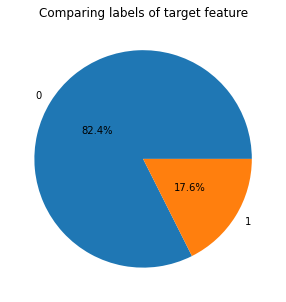

In [ ]:
values = df['target'].value_counts().values.tolist()
labels = df['target'].value_counts().index
plt.figure(figsize= (5,5))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

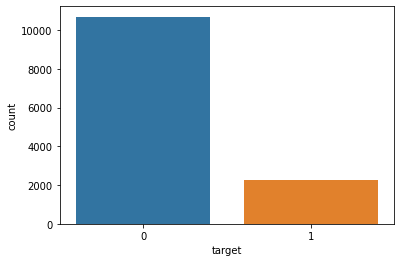

In [ ]:
sns.countplot(data=df, x='target')
plt.show()

## Dropping the Unnecessary Columns

In [ ]:
df1.drop(columns=['enrollee_id','city','company_size'],axis=1,inplace=True)
df1.head(5)

,city_development_index,gender,education_level,experience,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,0.776,0,2,15,5,47,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0.767,0,3,21,4,8,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
6,0.920,0,1,5,1,24,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
7,0.762,0,2,13,5,18,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
8,0.920,0,2,7,1,46,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## Splitting the dataset into Inputs and Output

In [ ]:
X = df1.drop(['target'], axis=1)
y = df1['target']

## Feature Importance


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.30751972 0.03541732 0.05241035 0.16371013 0.06791379 0.28453834
 0.01409024 0.00295045 0.00716396 0.0119134  0.00220803 0.00275839
 0.00167852 0.00214475 0.00480581 0.00583524 0.00612549 0.0070528
 0.00722875 0.01253453]


### Plotting Best Five Features 

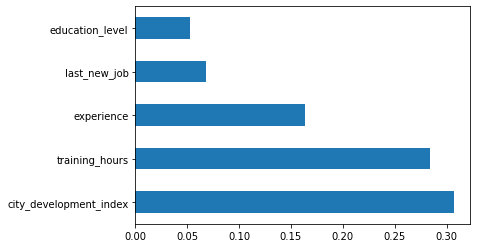

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

## Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Rescaling of data

In [ ]:
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9083, 20)
(3894, 20)
(9083,)
(3894,)


## Model Building 

In [ ]:
result=[]

### KNN

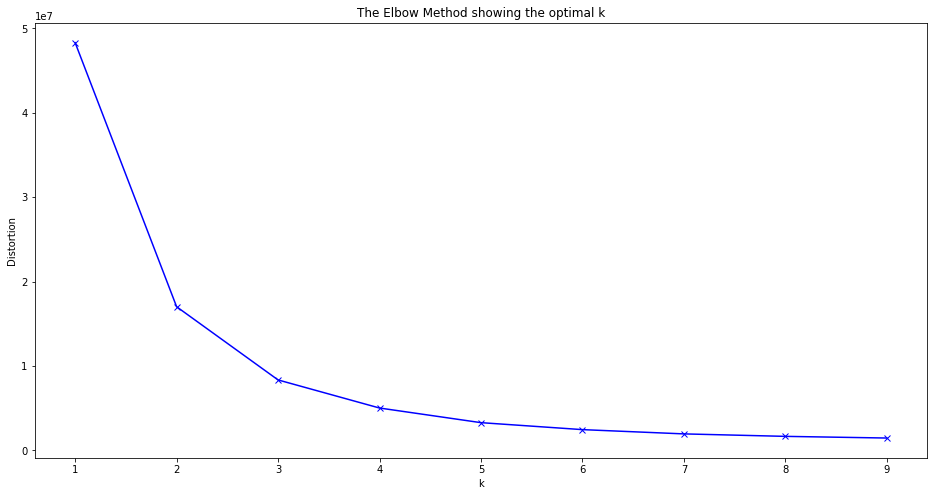

In [ ]:
# To plot the Elbow Diagram

from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Modelling KNN 

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
kn.fit(X_train,y_train)
knn_y_pred = kn.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,knn_y_pred)
print(' \n The confusion matrix and accuracy score for n_neighbors = ','\n')
print(cm)
print(' \n The accuracy score for n_neighbors = ','\n')
print(accuracy_score(y_test,knn_y_pred))  
acc_knn=accuracy_score(y_test,knn_y_pred)  
result.append(acc_knn)

 
 The confusion matrix and accuracy score for n_neighbors =  

[[2953  295]
 [ 429  217]]
 
 The accuracy score for n_neighbors =  

0.8140729327170005


#### A function to get best parameters for KNN

In [ ]:
def print_results(results):

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("Mean and Standard Deviation for :", params)
        print('{}, (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        print("-------------------------------------------")

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn1 = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3,4,5]
    }
cv = GridSearchCV(kn1, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

Mean and Standard Deviation for : {'n_neighbors': 3}
0.815, (+/-0.019) for {'n_neighbors': 3}
-------------------------------------------
Mean and Standard Deviation for : {'n_neighbors': 4}
0.83, (+/-0.011) for {'n_neighbors': 4}
-------------------------------------------
Mean and Standard Deviation for : {'n_neighbors': 5}
0.826, (+/-0.015) for {'n_neighbors': 5}
-------------------------------------------


### Naive Bayes

In [ ]:
  from sklearn.naive_bayes import GaussianNB
  nb=GaussianNB()
  nb.fit(X_train,y_train)
  
  nb_y_pred = nb.predict(X_test)
  
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm=confusion_matrix(y_test,nb_y_pred)
  print(' \n The confusion matrix for Naive Bayes is = ','\n')
  print(cm)
  print(' \n The accuracy score for Naive Bayes is = ','\n')
  print(accuracy_score(y_test,nb_y_pred))
  acc_nb=accuracy_score(y_test,nb_y_pred)  
  result.append(acc_nb)

 
 The confusion matrix for Naive Bayes is =  

[[2757  491]
 [ 289  357]]
 
 The accuracy score for Naive Bayes is =  

0.7996918335901386


### Decision Tree Classifier

#### CART: Uses gini index as criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart=DecisionTreeClassifier(criterion='gini',random_state=0)
cart.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
cart_y_pred=cart.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,cart_y_pred)
print(' \n The confusion matrix for CART is = ','\n')
print(cm)

print(' \n The accuracy score for CART is = ','\n')
print(accuracy_score(y_test,cart_y_pred))
acc_cart=accuracy_score(y_test,cart_y_pred)  
result.append(acc_cart)

 
 The confusion matrix for CART is =  

[[2759  489]
 [ 414  232]]
 
 The accuracy score for CART is =  

0.7681047765793528


#### C 5.0: Uses Entropy as Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

c5=DecisionTreeClassifier(criterion='entropy',random_state=0)
c5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
c5_y_pred=c5.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,c5_y_pred)
print(cm)
print(' \n The confusion matrix for C5.0 is = ','\n')

print(' \n The accuracy score for C5.0 is = ','\n')
print(accuracy_score(y_test,c5_y_pred))
acc_c5=accuracy_score(y_test,c5_y_pred)  
result.append(acc_c5)

[[2830  418]
 [ 402  244]]
 
 The confusion matrix for C5.0 is =  

 
 The accuracy score for C5.0 is =  

0.7894196199280945


### Random forest Classifier

In [ ]:
# Modelling Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,rf_y_pred)
print(' \n The confusion matrix for 100 no. of trees = ','\n')
print(cm)
print(' \n The accuracy score for 100 no. of trees = ','\n')
print(accuracy_score(y_test,rf_y_pred))
acc_rf=accuracy_score(y_test,rf_y_pred)  
result.append(acc_rf)

 
 The confusion matrix for 100 no. of trees =  

[[3059  189]
 [ 410  236]]
 
 The accuracy score for 100 no. of trees =  

0.8461736004108885


#### A function to get best parameters for Random Forest

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
parameters = {
    'n_estimators': [50,100,150,200,250],
    'criterion':['entropy','gini']
    
}
cv = GridSearchCV(rf1, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'criterion': 'entropy', 'n_estimators': 250}

0.839 (+/-0.006) for {'criterion': 'entropy', 'n_estimators': 50}
0.838 (+/-0.004) for {'criterion': 'entropy', 'n_estimators': 100}
0.838 (+/-0.008) for {'criterion': 'entropy', 'n_estimators': 150}
0.839 (+/-0.004) for {'criterion': 'entropy', 'n_estimators': 200}
0.839 (+/-0.006) for {'criterion': 'entropy', 'n_estimators': 250}
0.837 (+/-0.003) for {'criterion': 'gini', 'n_estimators': 50}
0.838 (+/-0.007) for {'criterion': 'gini', 'n_estimators': 100}
0.838 (+/-0.006) for {'criterion': 'gini', 'n_estimators': 150}
0.836 (+/-0.007) for {'criterion': 'gini', 'n_estimators': 200}
0.838 (+/-0.003) for {'criterion': 'gini', 'n_estimators': 250}


### ANN

#### Initializing Neural Network

In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size =32 , epochs = 100)

Epoch 1/100
284/284 [==============================] - 1s 1ms/step - loss: 0.7570 - accuracy: 0.4557
Epoch 2/100
284/284 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8154
Epoch 3/100
284/284 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8249
Epoch 4/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8368
Epoch 5/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8339
Epoch 6/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8358
Epoch 7/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8531
Epoch 8/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8458
Epoch 9/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8418
Epoch 10/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3759 - accura

#### Making predictions and evaluating the model

In [ ]:
ann_y_pred = ann.predict(X_test)
ann_y_pred = (ann_y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ann_y_pred)
print(' \n The confusion Matrix for ANN ','\n')
print(cm)

from sklearn.metrics import accuracy_score
print(' \n The accuracy score for ANN ','\n')
print(accuracy_score(y_test,ann_y_pred))

acc_ann=accuracy_score(y_test,ann_y_pred)  
result.append(acc_ann)

 
 The confusion Matrix for ANN  

[[3057  191]
 [ 424  222]]
 
 The accuracy score for ANN  

0.8420647149460708


## AUC/ROC curve

AUC Value for 'K Neighbors Classifier' =  0.6225440947703945
AUC Value for 'Naive Bayes' =  0.7007308141042261
AUC Value for 'Decision Tree_CART' =  0.6042894698714332
AUC Value for 'Decision Tree_C5.0' =  0.6245071985236925
AUC Value for 'Random Forest' =  0.6535677111134836
AUC Value for 'Artificial Neural Network' =  0.6424239160273909


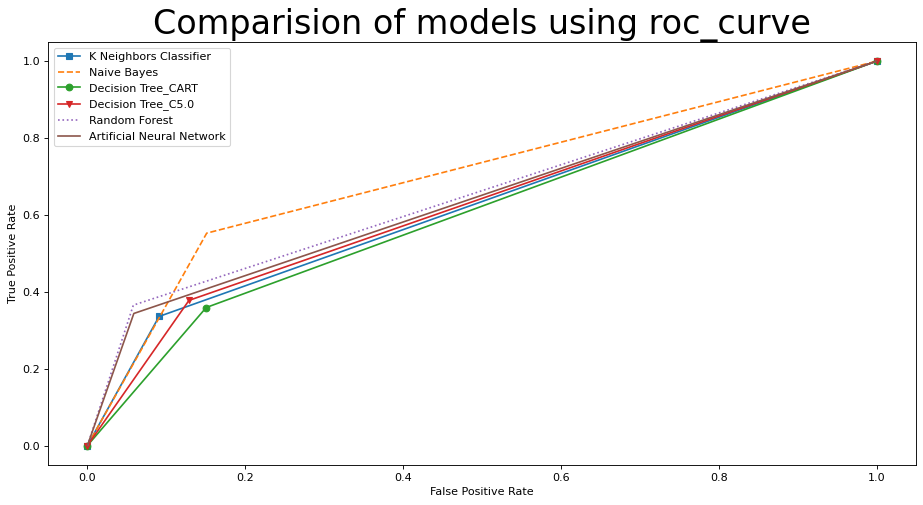

In [ ]:
#Comparision of models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure

result1=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred)
cart_fpr, cart_tpr, _ = roc_curve(y_test, cart_y_pred)
c5_fpr, c5_tpr, _ = roc_curve(y_test, c5_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_y_pred)

# Printing values for AUC

print("AUC Value for 'K Neighbors Classifier' = ",auc(knn_fpr, knn_tpr))
k=auc(knn_fpr, knn_tpr)
result1.append(k)
print("AUC Value for 'Naive Bayes' = ",auc(nb_fpr, nb_tpr))
n=auc(nb_fpr, nb_tpr)
result1.append(n)
print("AUC Value for 'Decision Tree_CART' = ",auc(cart_fpr, cart_tpr))
c=auc(cart_fpr, cart_tpr)
result1.append(c)
print("AUC Value for 'Decision Tree_C5.0' = ",auc(c5_fpr, c5_tpr))
c1=auc(c5_fpr, c5_tpr)
result1.append(c1)
print("AUC Value for 'Random Forest' = ",auc(rf_fpr, rf_tpr))
r=auc(rf_fpr, rf_tpr)
result1.append(r)
print("AUC Value for 'Artificial Neural Network' = ",auc(ann_fpr, ann_tpr))
a=auc(ann_fpr, ann_tpr)
result1.append(a)

# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='s', label='K Neighbors Classifier')
pyplot.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes')
pyplot.plot(cart_fpr, cart_tpr, marker='o', label='Decision Tree_CART')
pyplot.plot(c5_fpr, c5_tpr, marker='v', label='Decision Tree_C5.0')
pyplot.plot(rf_fpr, rf_tpr, linestyle=':', label='Random Forest')
pyplot.plot(ann_fpr, ann_tpr, linestyle='-', label='Artificial Neural Network')


# axis labels

# incorrectly predicts the positive class
pyplot.xlabel('False Positive Rate')

# correctly predicts the positive class
pyplot.ylabel('True Positive Rate')

pyplot.title("Comparision of models using roc_curve", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
results = pd.DataFrame({ "Models":["KNN",
                                  "Naive Bayes",
                                  "CART",
                                  "C5.0",
                                  "RandomForest",
                                  "ANN"
                                  ],
                        "Model Accuracy":result,
                        "AUC":result1
                        })
results

,Models,Model Accuracy,AUC
0,KNN,0.814073,0.622544
1,Naive Bayes,0.799692,0.700731
2,CART,0.768105,0.604289
3,C5.0,0.789420,0.624507
4,RandomForest,0.846174,0.653568
5,ANN,0.842065,0.642424


# Model Building for Best 5 features

In [ ]:
X1 = df1[['city_development_index','education_level','experience','last_new_job','training_hours']]
y1 = df1['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

#### Rescaling of data

In [ ]:
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9083, 5)
(3894, 5)
(9083,)
(3894,)


### KNN

In [ ]:
result2=[]

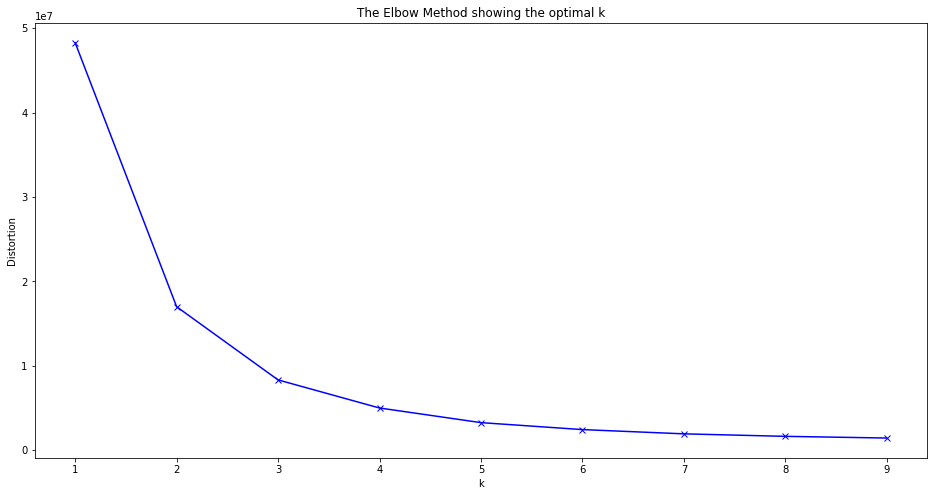

In [ ]:
# To plot the Elbow Diagram

from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Modelling KNN

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
kn.fit(X_train,y_train)
knn_y_pred5 = kn.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,knn_y_pred5)
print(' \n The confusion matrix and accuracy score for n_neighbors = \n')
print(cm)
print(' \n The accuracy score for n_neighbors = ','\n')
print(accuracy_score(y_test,knn_y_pred5))
acc_knn5=accuracy_score(y_test,knn_y_pred5)  
result2.append(acc_knn5)

 
 The confusion matrix and accuracy score for n_neighbors = 

[[2961  287]
 [ 428  218]]
 
 The accuracy score for n_neighbors =  

0.8163841807909604


#### A function to get best parameters for KNN

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn15 = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3,4,5]
    }
cv = GridSearchCV(kn15, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'n_neighbors': 5}

0.817 (+/-0.016) for {'n_neighbors': 3}
0.833 (+/-0.007) for {'n_neighbors': 4}
0.834 (+/-0.014) for {'n_neighbors': 5}


### Naive Bayes

In [ ]:
  from sklearn.naive_bayes import GaussianNB
  nb=GaussianNB()
  nb.fit(X_train,y_train)
  
  nb_y_pred5 = nb.predict(X_test)
  
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm=confusion_matrix(y_test,nb_y_pred5)
  print(' \n The confusion matrix for Naive Bayes is = ','\n')
  print(cm)
  print(' \n The accuracy score for Naive Bayes is = ','\n')
  print(accuracy_score(y_test,nb_y_pred5))
  acc_nb5=accuracy_score(y_test,nb_y_pred5)  
  result2.append(acc_nb5)

 
 The confusion matrix for Naive Bayes is =  

[[2914  334]
 [ 295  351]]
 
 The accuracy score for Naive Bayes is =  

0.8384694401643554


### Decision Tree Classifier

#### CART: Uses gini index as criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart=DecisionTreeClassifier(criterion='gini',random_state=0)
cart.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
cart_y_pred5=cart.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,cart_y_pred5)
print(' \n The confusion matrix for CART is = ','\n')
print(cm)
print(' \n The accuracy score for CART is = ','\n')
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,cart_y_pred5))
acc_cart5=accuracy_score(y_test,cart_y_pred5)  
result2.append(acc_cart5)

 
 The confusion matrix for CART is =  

[[2808  440]
 [ 401  245]]
 
 The accuracy score for CART is =  

0.7840267077555213


#### C 5.0: Uses Entropy as Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

c5=DecisionTreeClassifier(criterion='entropy',random_state=0)
c5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
c5_y_pred5=c5.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,c5_y_pred5)
print(cm)
print(' \n The confusion matrix for C5.0 is = ','\n')
from sklearn.metrics import accuracy_score
print(' \n The accuracy score for C5.0 is = ','\n')
print(accuracy_score(y_test,c5_y_pred5))
acc_c55=accuracy_score(y_test,c5_y_pred5)  
result2.append(acc_c55)

[[2829  419]
 [ 407  239]]
 
 The confusion matrix for C5.0 is =  

 
 The accuracy score for C5.0 is =  

0.7878787878787878


### Random forest Classifier

In [ ]:
# Modelling Random Forest

from sklearn.ensemble import RandomForestClassifier
rf5=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf5.fit(X_train,y_train)
rf_y_pred5 = rf5.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,rf_y_pred5)
print(' \n The confusion matrix for no. of trees = ','\n')
print(cm)
print(' \n The accuracy score for no. of trees = ','\n')
print(accuracy_score(y_test,rf_y_pred5))
acc_rf5=accuracy_score(y_test,rf_y_pred5)  
result2.append(acc_rf5)

 
 The confusion matrix for no. of trees =  

[[3050  198]
 [ 415  231]]
 
 The accuracy score for no. of trees =  

0.8425783256291731


#### A function to get best parameters for Random Forest

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf15 = RandomForestClassifier()
parameters = {
    'n_estimators': [50,100,150,200,250],
    'criterion':['entropy','gini']
    
}
cv = GridSearchCV(rf15, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'criterion': 'gini', 'n_estimators': 100}

0.832 (+/-0.01) for {'criterion': 'entropy', 'n_estimators': 50}
0.832 (+/-0.007) for {'criterion': 'entropy', 'n_estimators': 100}
0.833 (+/-0.012) for {'criterion': 'entropy', 'n_estimators': 150}
0.834 (+/-0.009) for {'criterion': 'entropy', 'n_estimators': 200}
0.833 (+/-0.01) for {'criterion': 'entropy', 'n_estimators': 250}
0.831 (+/-0.009) for {'criterion': 'gini', 'n_estimators': 50}
0.834 (+/-0.011) for {'criterion': 'gini', 'n_estimators': 100}
0.834 (+/-0.013) for {'criterion': 'gini', 'n_estimators': 150}
0.833 (+/-0.011) for {'criterion': 'gini', 'n_estimators': 200}
0.833 (+/-0.01) for {'criterion': 'gini', 'n_estimators': 250}


### ANN

#### Initializing Neural Network

In [ ]:
# Initializing the ANN
ann5 = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann5.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the second hidden layer
ann5.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the output layer
ann5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling the ANN

In [ ]:
ann5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the ANN on the Training set

In [ ]:
ann5.fit(X_train, y_train, batch_size =32 , epochs = 100)

Epoch 1/100
284/284 [==============================] - 1s 1ms/step - loss: 0.5615 - accuracy: 0.7409
Epoch 2/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8290
Epoch 3/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8405
Epoch 4/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8463
Epoch 5/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8412
Epoch 6/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8397
Epoch 7/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8424
Epoch 8/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8490
Epoch 9/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8438
Epoch 10/100
284/284 [==============================] - 0s 1ms/step - loss: 0.3759 - accura

#### Making predictions and evaluating the model

In [ ]:
ann_y_pred5 = ann5.predict(X_test)
ann_y_pred5 = (ann_y_pred5 > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ann_y_pred5)
print(' \n The confusion Matrix for ANN ','\n')
print(cm)

from sklearn.metrics import accuracy_score
print(' \n The accuracy score for ANN ','\n')
print(accuracy_score(y_test,ann_y_pred5))
acc_ann5=accuracy_score(y_test,ann_y_pred5)  
result2.append(acc_ann5)

 
 The confusion Matrix for ANN  

[[2990  258]
 [ 328  318]]
 
 The accuracy score for ANN  

0.8495120698510529


## AUC/ROC curve

AUC Value for 'K Neighbors Classifier' =  0.62454961567204
AUC Value for 'Naive Bayes' =  0.7202555704677516
AUC Value for 'Decision Tree_CART' =  0.621894492824353
AUC Value for 'Decision Tree_C5.0' =  0.6204832885967455
AUC Value for 'Random Forest' =  0.6483122740929403
AUC Value for 'Artificial Neural Network' =  0.7064132821912794


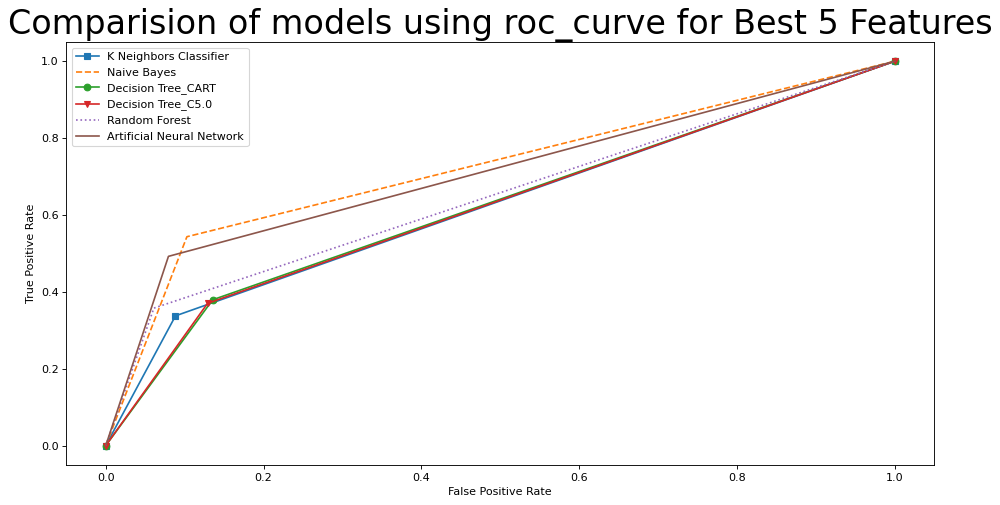

In [ ]:
#Comparision of models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure
result3=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

knn_fpr5, knn_tpr5, _ = roc_curve(y_test, knn_y_pred5)
nb_fpr5, nb_tpr5, _ = roc_curve(y_test, nb_y_pred5)
cart_fpr5, cart_tpr5, _ = roc_curve(y_test, cart_y_pred5)
c5_fpr5, c5_tpr5, _ = roc_curve(y_test, c5_y_pred5)
rf_fpr5, rf_tpr5, _ = roc_curve(y_test, rf_y_pred5)
ann_fpr5, ann_tpr5, _ = roc_curve(y_test, ann_y_pred5)

# plot the roc curve for the model

pyplot.plot(knn_fpr5, knn_tpr5, marker='s', label='K Neighbors Classifier')
pyplot.plot(nb_fpr5, nb_tpr5, linestyle='--', label='Naive Bayes')
pyplot.plot(cart_fpr5, cart_tpr5, marker='o', label='Decision Tree_CART')
pyplot.plot(c5_fpr5, c5_tpr5, marker='v', label='Decision Tree_C5.0')
pyplot.plot(rf_fpr5, rf_tpr5, linestyle=':', label='Random Forest')
pyplot.plot(ann_fpr5, ann_tpr5, linestyle='-', label='Artificial Neural Network')

# Printing values for AUC

print("AUC Value for 'K Neighbors Classifier' = ",auc(knn_fpr5, knn_tpr5))
k1=auc(knn_fpr5, knn_tpr5)
result3.append(k1)
print("AUC Value for 'Naive Bayes' = ",auc(nb_fpr5, nb_tpr5))
n1=auc(nb_fpr5, nb_tpr5)
result3.append(n1)
print("AUC Value for 'Decision Tree_CART' = ",auc(cart_fpr5, cart_tpr5))
c1=auc(cart_fpr5, cart_tpr5)
result3.append(c)
print("AUC Value for 'Decision Tree_C5.0' = ",auc(c5_fpr5, c5_tpr5))
c12=auc(c5_fpr5, c5_tpr5)
result3.append(c12)
print("AUC Value for 'Random Forest' = ",auc(rf_fpr5, rf_tpr5))
r1=auc(rf_fpr5, rf_tpr5)
result3.append(r)
print("AUC Value for 'Artificial Neural Network' = ",auc(ann_fpr5, ann_tpr5))
a1=auc(ann_fpr5, ann_tpr5)
result3.append(a1)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Comparision of models using roc_curve for Best 5 Features", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
results1 = pd.DataFrame({ "Models":["KNN",
                                  "Naive Bayes",
                                  "CART",
                                  "C5.0",
                                  "RandomForest",
                                  "ANN"
                                  ],
                        "Model Accuracy":result2,
                        "AUC":result3
                        })
results1

,Models,Model Accuracy,AUC
0,KNN,0.816384,0.624550
1,Naive Bayes,0.838469,0.720256
2,CART,0.784027,0.604289
3,C5.0,0.787879,0.620483
4,RandomForest,0.842578,0.653568
5,ANN,0.849512,0.706413


# Testing Our Model on Test Data

### Importing Test Dataset

In [ ]:
test= pd.read_csv("aug_test.csv")
test.head(10)
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Dropping the Null Values 

In [ ]:
test.dropna(inplace=True)

### Viewing the dimensions of Dataset

In [ ]:
test.shape

(1019, 13)

In [ ]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

### Label Encoding the experience,last_new_job,education_level columns

In [ ]:

desired_factors = ['city_development_index','education_level','experience','last_new_job','training_hours']

def replace(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0
    else:
        return experience

test.experience =test.experience.map(replace) 
print(test['experience'].unique())  

def replace(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0

    else:
        return last_new_job

test.last_new_job =test.last_new_job.map(replace)
print(test['last_new_job'].unique())

def replace(education_level):
    if education_level == 'Primary School':
        return 0
    elif education_level == 'High School':
        return 1
    elif education_level == 'Graduate':
        return 2
    elif education_level == 'Masters':
        return 3
    elif education_level == 'Phd':
        return 4
    else:
        return -1
test.education_level =test.education_level.map(replace)
test['education_level'].unique()


['11' 21 '20' '8' '4' '2' '6' '19' '7' '16' '5' '3' '10' '14' '18' 0 '13'
 '12' '9' '17' '1' '15']
['1' 5 '2' 0 '3' '4']


array([3, 2, 4])

### Changing the data type of Variables

In [ ]:
test['experience']=test['experience'].astype('int')
test['last_new_job']=test['last_new_job'].astype('int')
test.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level             int64
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
dtype: object

### Testing based on Accuracy

In [ ]:

train_data = df1[desired_factors]
test_data = test[desired_factors]
target = df1.target

#fitting model with best accuracy on train data to predict test data
rf.fit(train_data, target)

y=rf.predict(test_data)
test_prediction = pd.DataFrame(y)

In [ ]:
print(type(test_prediction))
test_prediction.value_counts()

<class 'pandas.core.frame.DataFrame'>


0    899
1    120
dtype: int64

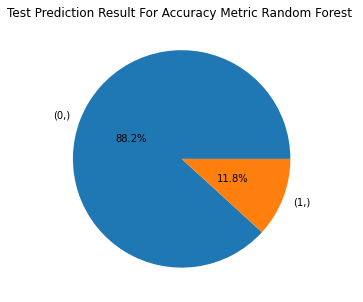

In [ ]:
values = test_prediction.value_counts().values.tolist()
labels = test_prediction.value_counts().index
plt.figure(figsize= (5,5))
plt.title('Test Prediction Result For Accuracy Metric Random Forest ')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

### Testing based on AUC

In [ ]:

train_data = df1[desired_factors]
test_data = test[desired_factors]
target = df1.target

#fitting model with best AUC values on train data to predict test data
nb.fit(train_data, target)

y=nb.predict(test_data)
test_prediction = pd.DataFrame(y)

In [ ]:
print(type(test_prediction))
test_prediction.value_counts()

<class 'pandas.core.frame.DataFrame'>


0    847
1    172
dtype: int64

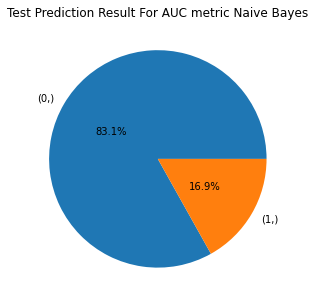

In [ ]:
values = test_prediction.value_counts().values.tolist()
labels = test_prediction.value_counts().index
plt.figure(figsize= (5,5))
plt.title('Test Prediction Result For AUC metric Naive Bayes')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()